In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.load("vad_features.npy")
y = np.load("vad_labels.npy")

X = X / np.max(np.abs(X))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input shape: (time_steps, feature_dim)
input_shape = X_train.shape[1:]  # e.g., (100, 40)

model = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 198, 32)        │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 99, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 97, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,225 (797.75 KB)

 Trainable params: 204,225 (797.75 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.6402 - loss: 0.5832 - val_accuracy: 0.8259 - val_loss: 0.3844
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8684 - loss: 0.3255 - val_accuracy: 0.9185 - val_loss: 0.2125
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9419 - loss: 0.1691 - val_accuracy: 0.9667 - val_loss: 0.1057
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9645 - loss: 0.1165 - val_accuracy: 0.9630 - val_loss: 0.1034
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9652 - loss: 0.1016 - val_accuracy: 0.9630 - val_loss: 0.0881
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9583 - loss: 0.1002 - val_accuracy: 0.9778 - val_loss: 0.0742
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9728 - loss: 0.0806 - val_accuracy: 0.9741 - val_loss: 0.0760
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9604 - loss: 0.1030 - val_accuracy: 0.9741 - val_loss

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9896 - loss: 0.0397 
Test Accuracy: 0.9852


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


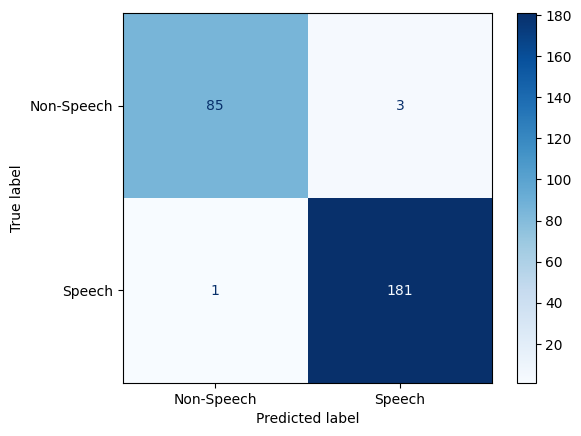

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Speech', 'Speech'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


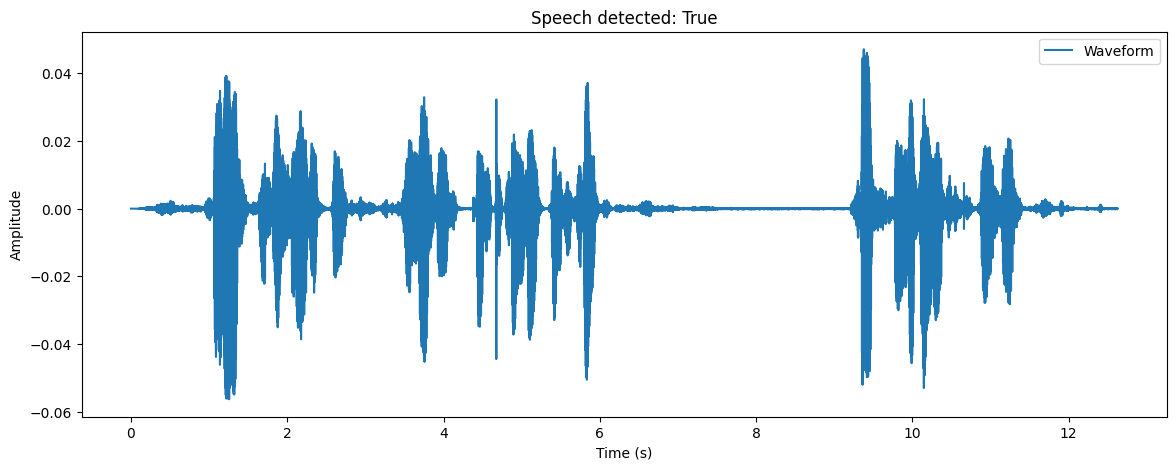

In [8]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load audio file (example)
audio_path = 'test_ses.wav'
y, sr = librosa.load(audio_path, sr=16000)

# Extract MFCC features exactly like training
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T

# Pad/truncate MFCC to model input length (e.g., max_len=200)
max_len = 200
if len(mfcc) > max_len:
    mfcc_input = mfcc[:max_len]
else:
    mfcc_input = np.pad(mfcc, ((0, max_len - len(mfcc)), (0, 0)), mode='constant')

mfcc_input = mfcc_input[np.newaxis, ...]  # Add batch dim

# Predict speech/non-speech probability
pred_probs = model.predict(mfcc_input)[0][0]

# For frame-level prediction you might need to adjust your model to output per frame

# Simple binary mask example (for whole clip)
speech_detected = pred_probs > 0.5

# Plot waveform
plt.figure(figsize=(14, 5))
plt.plot(np.linspace(0, len(y)/sr, len(y)), y, label='Waveform')
plt.title(f"Speech detected: {speech_detected}")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [9]:
model.save("vad_cnn_model.h5")